In [5]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key

In [6]:
# Save config information.
base_url  = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city="Paris"
# Build query URL
query_url = base_url +"q=" + city+ "&appid=" + api_key + "&units=" + units

In [7]:
query_url

'http://api.openweathermap.org/data/2.5/weather?q=Paris&appid=3a2f23c34d42afe6befaa3e51767745b&units=metric'

In [9]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold response info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = base_url +"q=" + city+ "&appid=" + api_key + "&units=" + units
    response = requests.get(query_url).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075]
The temperature information received is: [17.81, 12.12, 16.25, 23.83]


In [10]:
# create a DataFrame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,17.81
1,London,51.5085,12.12
2,Oslo,59.9127,16.25
3,Beijing,39.9075,23.83


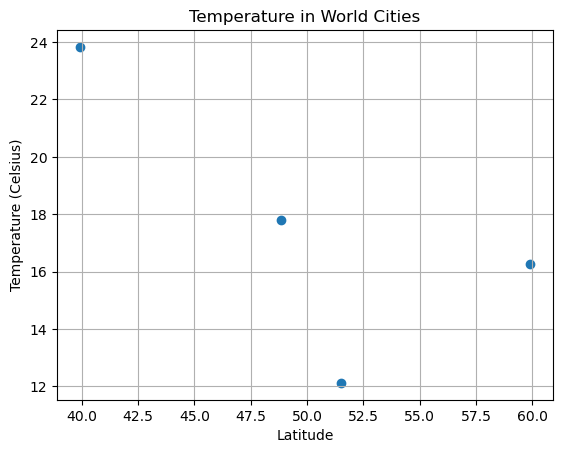

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()